Verified GPU details

In [1]:
!nvidia-smi

Fri Jan 30 09:36:29 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Loaded Kaggle for dataset

In [2]:
import os
from google.colab import userdata

In [3]:
os.environ['KAGGLE_USERNAME']= userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY']= userdata.get('KAGGLE_KEY')

Downloaded and unzipped a pothole image dataset from Kaggle

In [4]:
!kaggle datasets download rajdalsaniya/pothole-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rajdalsaniya/pothole-detection-dataset
License(s): CC0-1.0
 65% 152M/235M [00:00<00:00, 1.59GB/s]
100% 235M/235M [00:00<00:00, 986MB/s] 


In [5]:
!unzip pothole-detection-dataset.zip

Archive:  pothole-detection-dataset.zip
  inflating: README.roboflow.txt     
  inflating: data.yaml               
  inflating: train/images/100_jpg.rf.677e50f854729e860e02c0471fc67783.jpg  
  inflating: train/images/100_jpg.rf.c41c2e9931775d235af0407ffcbec043.jpg  
  inflating: train/images/100_jpg.rf.d212f4c364a9d9980eee8b751f559a61.jpg  
  inflating: train/images/101_jpg.rf.73f6bd6e88c86e891edbbcef3402254a.jpg  
  inflating: train/images/101_jpg.rf.ebed18af5362f5e41251d7c5d5bccbab.jpg  
  inflating: train/images/101_jpg.rf.f9d58bc19bcb170e962e1f9e8c4e665e.jpg  
  inflating: train/images/102_jpg.rf.4135c34838538feae6fda98dfb6e8cd7.jpg  
  inflating: train/images/102_jpg.rf.46827740827c370519d5cdf587b390ae.jpg  
  inflating: train/images/102_jpg.rf.f2944cec5a17c9d9d17cade72d1cbc25.jpg  
  inflating: train/images/103_jpg.rf.69962b9221e93559b2e9ad2ba3895ae4.jpg  
  inflating: train/images/103_jpg.rf.cbb074f57a224e86dd546d657112bdfa.jpg  
  inflating: train/images/104_jpg.rf.c4ba8071dab

Verified the folder structure

In [6]:
ls

data.yaml                      README.roboflow.txt  train/
pothole-detection-dataset.zip  sample_data/         valid/


Installed ultralytics to access YOLO

In [10]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.9 MB/s eta 0:00:00


Trained a yolo model on the downloaded dataset(pothole images), with 50 epoch and early stopping(patience=10)

In [11]:
!yolo task=detect mode=train \
model=yolo26n.pt \
data=data.yaml \
epochs=50 \
imgsz=640 \
batch=16 \
val = True \
plots = True \
patience=10

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, ker

removed previous training from the trained model

In [13]:
!rm -rf /content/pothole_dataset/labels.cache
!rm -rf /content/pothole_dataset/images.cache

Tested the model with a sample input and confidence score of 0.30

In [14]:
!yolo predict \ model=/content/runs/detect/train/weights/best.pt \ source=/content/pothole2.jpg \ conf=0.30

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO26n summary (fused): 122 layers, 2,375,031 parameters, 0 gradients, 5.2 GFLOPs

image 1/1 /content/pothole2.jpg: 448x640 3 potholes, 56.7ms
Speed: 3.2ms preprocess, 56.7ms inference, 14.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


(np.float64(-0.5), np.float64(611.5), np.float64(407.5), np.float64(-0.5))

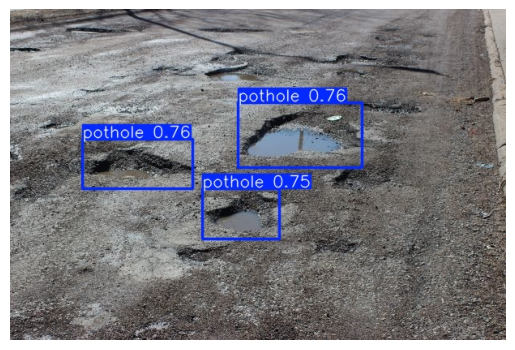

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("/content/runs/detect/predict/pothole2.jpg")
plt.imshow(img)
plt.axis("off")

In [17]:
!yolo predict \ model=/content/runs/detect/train/weights/best.pt \ source=/content/pothole1.jpg \ conf=0.30

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO26n summary (fused): 122 layers, 2,375,031 parameters, 0 gradients, 5.2 GFLOPs

image 1/1 /content/pothole1.jpg: 384x640 4 potholes, 56.9ms
Speed: 3.4ms preprocess, 56.9ms inference, 15.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


(np.float64(-0.5), np.float64(299.5), np.float64(167.5), np.float64(-0.5))

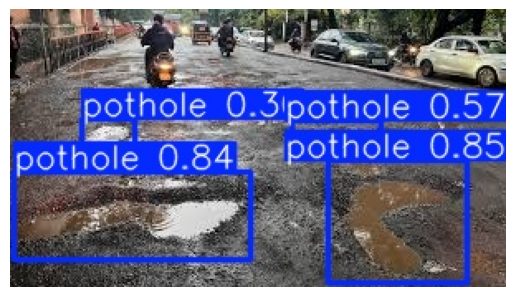

In [18]:
img = Image.open("/content/runs/detect/predict2/pothole1.jpg")
plt.imshow(img)
plt.axis("off")

Parameters model is trained for

In [20]:
from ultralytics import YOLO
model = YOLO("/content/runs/detect/train/weights/best.pt")
print(model.names)

{0: 'pothole'}


Downloaded the model

In [23]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>